In [545]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import plotly_express as px


In [546]:
#reading csv file into pandas dataframe and naming df
df = pd.read_csv("/Users/beans/Desktop/Mod-4-Project/data/hour.csv")

#understanding values within df


df['dteday'] = pd.to_datetime(df['dteday'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [547]:
#making season column more legibile by associating numbers with season
#shown by readme when downloaded dataset
df['season'] = df['season'].replace(1,'winter')
df['season'] = df['season'].replace(2,'spring')
df['season'] = df['season'].replace(3,'summer')
df['season'] = df['season'].replace(4,'fall')


### VERY SIMPLE EDA for season and windspeeds column

df.groupby('season')['cnt'].sum()
#--we can see that winter has the least count for rides, and summer the most
#--INTEREST OF Product Manager (PM): When/where demand is strong or fragile (strong in summer, weak in winter); user behavior patterns; which hypotheses to prioritize next quarter.

df['season'].value_counts()
#--summer does have the highest counts of records (4496), with fall being the least (4232)
#--if data is responsbly distributed by season


#curious to see the average windspeed between winter and summer, maybe its the deciding factor
df.groupby('season')['windspeed'].mean()
#--average windspeeds of winter is comparable to spring, which has the second highest count for rides, maybe not such a big deal

#checking our normal windspeeds to see if a drastic diff between seasons (readme says windspeed column was divided by 67)
df['not_norm_windspeeds'] = df['windspeed'] * 67
df.groupby('season')['not_norm_windspeeds'].mean()
#--windspeeds change are so miniscule, would have to statistically prove if significant (potential chi-squared test)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              17379 non-null  int64         
 1   dteday               17379 non-null  datetime64[ns]
 2   season               17379 non-null  object        
 3   yr                   17379 non-null  int64         
 4   mnth                 17379 non-null  int64         
 5   hr                   17379 non-null  int64         
 6   holiday              17379 non-null  int64         
 7   weekday              17379 non-null  int64         
 8   workingday           17379 non-null  int64         
 9   weathersit           17379 non-null  int64         
 10  temp                 17379 non-null  float64       
 11  atemp                17379 non-null  float64       
 12  hum                  17379 non-null  float64       
 13  windspeed            17379 non-

# VERY ROUGH VISUALIZATIONS FOR EDA

<Axes: xlabel='season'>

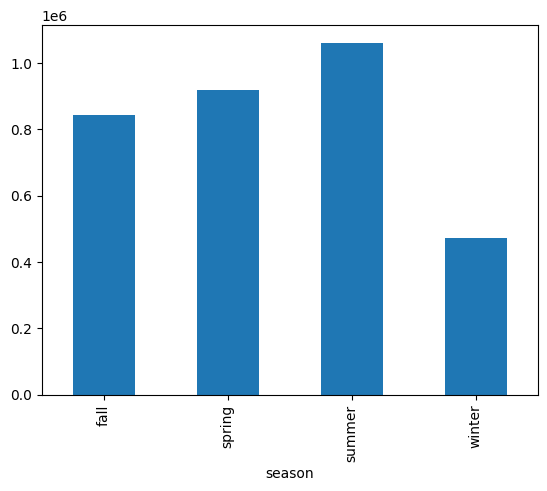

In [548]:
#visual for seasonality differences in bikeshare usage

df.groupby('season')['cnt'].sum().plot(kind='bar')


In [549]:
### QUICK EDA to find hour vs count (most frequent hours ppl use bikes)

#EDA to find the highest average of bike usage by hour
df.groupby('hr')['cnt'].mean().sort_values(ascending=False)
#--shows us 17,18, and 8 has highest,
#-- 5 hours above 300 count mean



#after more EDA, there are no 'cnt' = 0, 7035 less than or equal to 100,  3749 100 < 'cnt' <= 200, 2740 200 < 'cnt' <= 300,  3874 'cnt' > 301
#the days that have the least values, are because of natural disasters and snow days
df[(df['cnt'] > 301)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,not_norm_windspeeds
1103,1104,2011-02-18,winter,0,2,17,0,5,1,1,0.66,0.6212,0.34,0.3582,52,275,327,23.9994
1634,1635,2011-03-13,winter,0,3,15,0,0,0,1,0.48,0.4697,0.39,0.3284,149,155,304,22.0028
1729,1730,2011-03-17,winter,0,3,17,0,4,1,1,0.50,0.4848,0.42,0.1940,48,265,313,12.9980
1730,1731,2011-03-17,winter,0,3,18,0,4,1,2,0.46,0.4545,0.59,0.1642,50,260,310,11.0014
1752,1753,2011-03-18,winter,0,3,17,0,5,1,1,0.70,0.6364,0.37,0.3284,95,237,332,22.0028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17110,17111,2012-12-20,fall,1,12,17,0,4,1,2,0.34,0.3333,0.66,0.1940,25,450,475,12.9980
17111,17112,2012-12-20,fall,1,12,18,0,4,1,2,0.34,0.3333,0.71,0.1940,22,359,381,12.9980
17125,17126,2012-12-21,winter,1,12,8,0,5,1,2,0.32,0.3030,0.57,0.2836,8,464,472,19.0012
17134,17135,2012-12-21,winter,1,12,17,0,5,1,2,0.26,0.2273,0.56,0.3284,24,297,321,22.0028


In [550]:
hourcount = df[['hr','cnt']]


# visual explaining count of users for bikeshare program by the hour,
# hourcount uses all data, i went into specific working days in the next codeblock to see if that is of interest


# we can see workindays are more frequent by double
# does it make sense to filter dataset to only workingday and assume the reason why its double is due to ppl who go to work? 
both = ['workingday','weekday']

df.groupby(both)['cnt'].sum()

workingday  weekday
0           0          444027
            1           59605
            2            1013
            3            7403
            4            3920
            5            6494
            6          477807
1           1          395898
            2          468096
            3          465645
            4          481475
            5          481296
Name: cnt, dtype: int64

In [551]:
#complete workingday indexes (not weekends & not holidays)

workingdays = df[df['workingday'] == 1]
#steeper curves and higher means if we just focus on working days
linegraph = workingdays.groupby('hr')['cnt'].median().reset_index()
windspeedsmean = workingdays.groupby('hr')['not_norm_windspeeds'].mean().reset_index()

fulldata = pd.merge(linegraph,windspeedsmean,on='hr')
# BEST SUITED FOR OPERATIONS TEAM, GIVES US TIMES WHEN LEAST LIKELY FOR BIKE RIDES AND CAN DO MAINTENENCE

print(fulldata['cnt'].mean())

lines = px.line(fulldata,x='hr',y='cnt',title='Count of Average Riders per Hour',width=650,height=500)
lines.update_layout(xaxis_title='Hour',yaxis_title='Average Count of Riders',font=dict(size=12))



190.875


In [552]:
timebin=[]
for i in range (len(fulldata)):
    count = fulldata.iloc[i]['cnt']
    if count >= 275:
        timebin.append('Peak Hours')
    elif 100 < count < 275:
        timebin.append('Not Peak')
    elif count < 100:
        timebin.append('Maintenance')
fulldata['timebin'] = timebin

fulldata
#during peak hours seems pretty okay for windspeeds

,hr,cnt,not_norm_windspeeds,timebin
0,0,33.0,10.683785,Maintenance
1,1,14.0,10.378924,Maintenance
2,2,7.0,10.178965,Maintenance
3,3,4.0,10.117456,Maintenance
4,4,5.0,10.387609,Maintenance
5,5,25.0,10.087290,Maintenance
6,6,104.0,10.552878,Not Peak
7,7,295.0,11.016394,Peak Hours
8,8,463.0,11.804752,Peak Hours
9,9,228.0,12.982155,Not Peak


In [ ]:
# creating variables filtering workingdays to morningpeaks and evening peaks (2 highest average count in our line graph)

morningpeak = workingdays[(workingdays['hr'] == 7) | (workingdays['hr'] == 8)]
eveningpeak = workingdays[(workingdays['hr'] == 17) | (workingdays['hr'] == 18)]


### WINDSPEEDS HISTOGRAMS (very dangerous windspeeds during these hours, would benefit from a warning/speed reduction)

# MORNING HISTOGRAM (windspeeds are up to danagerous levels)
morningwinds = morningpeak.groupby('dteday').agg({'cnt':'mean','not_norm_windspeeds':'mean'}).reset_index()
morninghist = px.histogram(morningwinds,'not_norm_windspeeds','cnt',title='Count of Rides by Windspeed Per Day',nbins=24,height=500,width=600)

# EVENING HISTOGRAM (windspeed averages go up to even 40 mph)
eveningwinds = eveningpeak.groupby('dteday').agg({'cnt':'mean','not_norm_windspeeds':'mean'}).reset_index()
eveninghist = px.histogram(eveningwinds,'not_norm_windspeeds','cnt',title='Count of Rides by Windspeed Per Day',nbins=24,height=500,width=600)

### SEASONAL BAR GRAPHS

# MORNING BAR GRAPH (during mornings, summer bikes most frequently used, fall second)
morningbar = morningpeak.groupby('season')['cnt'].sum().reset_index()

morningseasonality = px.bar(morningbar,'season','cnt',text='cnt',title='Count of Total Rides by Season',width=450,height = 500)
morningseasonality.update_layout(xaxis_title='Season', yaxis_title='Total Count of Rides', font=dict(size=12))
morningseasonality.update_traces(marker_color = ['RoyalBlue', 'RoyalBlue', 'ForestGreen', 'FireBrick'],textposition='outside')

# EVENING BAR GRAPH (during evenings, summer bikes are more frequently used, spring second)
eveningbar = eveningpeak.groupby('season')['cnt'].sum().reset_index()

eveningseasonality = px.bar(eveningbar,'season','cnt',text='cnt',title='Count of Total Rides by Season',width=450,height = 500)
eveningseasonality.update_layout(xaxis_title='Season', yaxis_title='Total Count of Rides', font=dict(size=12))
eveningseasonality.update_traces(marker_color = ['RoyalBlue', 'RoyalBlue', 'ForestGreen', 'FireBrick'],textposition='outside')

### COMPISITION PIE GRAPHS (checking to see registered bike rides vs casual per peak)

# morning peak pie
morningcountindex = morningpeak[['dteday','casual','registered','cnt']].reset_index()
morningsums = morningcountindex[['casual','registered']].mean()

morningpie = px.pie(morningsums,names=['casual','registered'],values=morningsums)

# evening peak pie (a higher percentage of casual bike riders in the evening compared to night but still both smaller percentages vs all day pie)

eveningcountindex = eveningpeak[['dteday','casual','registered','cnt']].reset_index()
eveningsums = eveningcountindex[['casual','registered']].mean()

eveningpie = px.pie(eveningsums,names=['casual','registered'],values=eveningsums)

eveningpie

In [553]:
#tabular format for workingdays based on each day
#workingdays.groupby('dteday').agg({'cnt':['min','max','mean'],'temp':['mean'],'hum':['mean'],'not_norm_windspeeds':['max','mean']})


#workingdays['not_norm_windspeeds'].mean()
#--potential opportunity to provide safety enhancements for windspeeds far above the mean (like 10 more)


#SHOWS SPREAD OF WINDSPEED, many values above 20, mean is 12 (a lot of values of 0)
#workingdays['not_norm_windspeeds'].plot(kind='hist')

#workingdays['z_score_windspeed'] = stats.zscore(workingdays['not_norm_windspeeds'])
#workingdays.plot(kind='hist',x='z_score_windspeed',y='cnt')

#sns.kdeplot(workingdays['windspeed'])

#workingdays['windspeed'].sample(100).plot(kind='kde')

#SHOWS SPREAD OF WINDSPEED FOR ALL DAYS, many values above 20, mean is 12 (a lot of values of 0)
workingdensity = workingdays.groupby('dteday').agg({'cnt':'mean','not_norm_windspeeds':'mean'}).reset_index()

density = px.histogram(workingdensity,'not_norm_windspeeds','cnt',title='Count of Rides by Windspeed Per Day',nbins=24,height=500,width=600)
density.update_layout(xaxis_title='Average Windspeed During Day',yaxis_title='Average Count of Riders',font=dict(size=12))



In [554]:
len(workingdensity)
df['dteday'].value_counts(ascending=True)

check = df.groupby('dteday').count().reset_index()
morecheck = check['instant'] < 24
check[morecheck]

# after further investigation, most of these dates are hurricanes (irene & sandy) or blizzard affecting bike routes

,dteday,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,not_norm_windspeeds
1,2011-01-02,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
2,2011-01-03,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
3,2011-01-04,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
4,2011-01-05,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
5,2011-01-06,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,2012-10-30,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
677,2012-11-08,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
698,2012-11-29,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
723,2012-12-24,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23


In [555]:
day = df['dteday'] == '2011-01-27'
df[day]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,not_norm_windspeeds
587,588,2011-01-27,winter,0,1,16,0,4,1,1,0.22,0.2273,0.55,0.1940,1,23,24,12.9980
588,589,2011-01-27,winter,0,1,17,0,4,1,1,0.22,0.2424,0.55,0.1045,2,82,84,7.0015
589,590,2011-01-27,winter,0,1,18,0,4,1,1,0.20,0.2273,0.69,0.0896,3,101,104,6.0032
590,591,2011-01-27,winter,0,1,19,0,4,1,1,0.20,0.2273,0.69,0.0896,3,76,79,6.0032
591,592,2011-01-27,winter,0,1,20,0,4,1,1,0.18,0.2121,0.74,0.0896,4,55,59,6.0032
592,593,2011-01-27,winter,0,1,21,0,4,1,1,0.18,0.2121,0.74,0.0896,2,36,38,6.0032
593,594,2011-01-27,winter,0,1,22,0,4,1,1,0.18,0.2121,0.74,0.0896,0,27,27,6.0032
594,595,2011-01-27,winter,0,1,23,0,4,1,1,0.18,0.1970,0.80,0.1642,0,16,16,11.0014


In [556]:
workingdensity.head()

,dteday,cnt,not_norm_windspeeds
0,2011-01-03,61.318182,16.636709
1,2011-01-04,67.913043,10.739809
2,2011-01-05,69.565217,12.522300
3,2011-01-06,69.826087,6.000870
4,2011-01-07,65.652174,11.304648


In [557]:
timebin=[]
for i in range (len(workingdensity)):
    count = workingdensity.iloc[i]['cnt']
    #270 is above the 80th quantile
    if count >= 270:
        timebin.append('Peak Day')
    elif 100 < count < 270:
        timebin.append('Not Peak')
    elif count < 100:
        timebin.append('Maintenance')
workingdensity['timebin'] = timebin

# PEAK DAY IS DEFINED AS AVERAGE COUNT OF BIKERS ON A DAY GREATER THAN THE 80TH QUANTILE



In [558]:
peak = workingdensity[workingdensity['timebin'] == 'Peak Day']

peakgram = px.histogram(peak,'not_norm_windspeeds','cnt',title='Count of Rides by Windspeed During Peak Days',nbins=24,height=500,width=600)
peakgram.update_layout(xaxis_title='Average Windspeed',yaxis_title='Average Count of Riders',font=dict(size=12))


In [559]:
workingbar = workingdays.groupby('season')['cnt'].sum().reset_index()

#SEASONALITY FOR WORKINGDAYS GOOD FOR PM
seasonality = px.bar(workingbar,'season','cnt',text='cnt',title='Count of Total Rides by Season',width=450,height = 500)
seasonality.update_layout(xaxis_title='Season', yaxis_title='Total Count of Rides', font=dict(size=12))
seasonality.update_traces(marker_color = ['RoyalBlue', 'RoyalBlue', 'ForestGreen', 'FireBrick'],textposition='outside')



In [621]:
#a lot more registered users than casual, same goes for original dataframe
workingdays[['registered','casual']].sum()

print('total count sum',workingdays['cnt'].sum())
print('total casual sum',workingdays['casual'].sum())
print('total registered sum',workingdays['registered'].sum())
#--unsure to use if to not potentially bias registered users


piedata = workingdays[['casual','registered']].sum().reset_index
workingpie = px.pie(workingdays,values=workingdays[['casual','registered']].sum(),names=['casual','registered'],title='Percentage of Casual vs Registered',height=400, width=500)
workingpie.update_layout(font=dict(size=15))

#workingdays.groupby('weekday').agg('ocasual')
#--thursday on average have the highest usage for bike share but not by much

#workingdays.groupby('season')['casual'].sum()


total count sum 2292410
total casual sum 303285
total registered sum 1989125
